In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import glob
import quantum as qm
import seaborn as sns
from matplotlib.colors import ListedColormap

colors = ["black"]
sns.set_palette(sns.color_palette("Set1", 7)[::-1]+sns.xkcd_palette(colors)+sns.color_palette("Set1", 7))

# Without Field

In [2]:
OTOCs = np.load('data/zotocs_L15end13n20_0.2#5.npy') - 1

L = 15
end = 13; n = 20; tot = n*end
field_strength = .35

prefix = "data/zotocs_L"+str(L)+"end"+str(end)+"n"+str(n)+"_"+str(field_strength)+"#"
fnames = glob.glob(prefix + "*.npy")
trials = len(fnames)
OTOCs = np.zeros((trials, L, tot))
for idx, fname in enumerate(fnames):
    OTOCs[idx] = np.load(fname) - 1

mean, std = qm.mean_and_std(OTOCs)

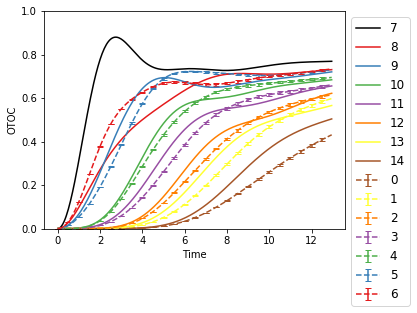

In [3]:
ax = plt.subplot(111)
for i in range(L//2):
    ax.errorbar(np.arange(tot)/n, mean[i], errorevery=10, yerr=std[i], label = str(i), linestyle='dashed')
for i in range(L//2,L):
    ax.plot(np.arange(tot)/n, mean[i], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.0, 1), loc=2)
plt.ylim(1e-15,1)
plt.ylabel("OTOC")
plt.xlabel('Time')
# plt.savefig('figures/zotoc_middle.pdf')
# plt.xlim(.3,20)
plt.show()

### Color plot

In [4]:
cmap = pl.cm.afmhot
my_cmap = cmap(np.arange(cmap.N)[::-1])
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

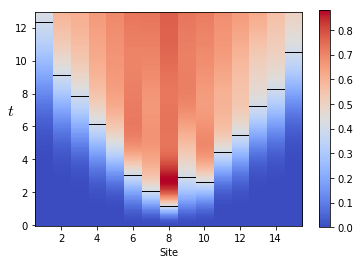

In [10]:
L, tot = np.shape(mean)
T = 13
data = mean.T[len(mean.T)*T//end::-1]
extent = [1 - .5, L+.5, -.5/n, T-.5/n]

# Plot Data
fig, ax = plt.subplots()
interpolation='nearest'
cs = ax.imshow(data, cmap='coolwarm', interpolation=interpolation, extent=extent)
ax.set_aspect(1)
fig.colorbar(cs)

# Overlay bars
bar_pos = .4
cs = ax.imshow(np.logical_and(data < bar_pos, np.roll(data, 1, axis=0) > bar_pos), interpolation='nearest', cmap=my_cmap, extent=extent)

plt.ylabel("$t$", rotation=0, fontsize=16)
plt.xlabel("Site")
if interpolation==None: interpolation='none'
ax.set_aspect(.8*L/T)
# plt.savefig('figures/L'+str( L)+'t'+str(tot/n)+interpolation+'.pdf')
plt.show()

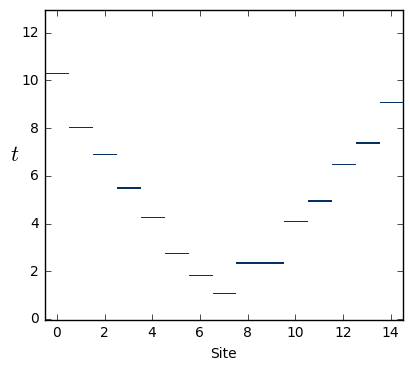

In [53]:
fig, ax = plt.subplots()
data = mean.T[len(mean.T)*12//13::-1]
cs = ax.imshow(np.logical_and(data < .3, np.roll(data, 1, axis=0) > .3), interpolation='nearest', cmap=my_cmap, extent=[-.5,L-.5,-.5/n,tot/n-.5/n])
ax.set_aspect(1)
plt.ylabel("$t$", rotation=0, fontsize=16)
plt.xlabel("Site")
plt.show()

In [6]:
hhh

NameError: name 'hhh' is not defined

# With Field

In [ ]:
OTOCs = np.load('data/zotocs_L11end20n3_1#1.npy')
L, tot = np.shape(OTOCs)
n = 3

In [ ]:
ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(tot)/n, OTOCs[i], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(1e-15,1)
plt.xlim(.3,20)
plt.show()

# L = 14

In [ ]:
L = 14; end = 20; n = 3; field_strength = 1
prefix = "data/zotocs_L"+str(L)+"end"+str(end)+"n"+str(n)+"_"+ \
          str(field_strength)+"#"
existing = glob.glob(prefix + "*.npy")
OTOCs = []
for fname in existing:
    OTOCs.append(np.load(fname))

In [ ]:
mean, std = qm.mean_and_std(OTOCs)
ax = plt.subplot(111)
ax.set_xscale("log", nonposx='mask')
ax.set_yscale("log", nonposx='mask')
for i in range(L):
    ax.errorbar(np.arange(tot)/n, mean[i], yerr=std[i], label = str(i))
#     ax.plot(    np.arange(tot)/n, mean[i],              label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(1e-15,.5)
plt.xlim(.3,10)
plt.show()

# Testing

In [ ]:
L = 14; end = 20; n = 3; field_strength = 1
prefix = "data/zotocs_L"+str(L)+"end"+str(end)+"n"+str(n)+"_"+ \
          str(field_strength)+"#"
OTOCs = np.load(prefix + "0.npy")

In [ ]:
mean = OTOCs
ax = plt.subplot(111)
# ax.set_xscale("log", nonposx='mask')
# ax.set_yscale("log", nonposx='mask')
for i in range(L):
    ax.plot(    np.arange(tot)/n, mean[i],              label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
# plt.ylim(1e-15,.5)
# plt.xlim(.3,10)
plt.show()

In [42]:
11//2

5

In [24]:
mean

array([[1.00000318, 1.00000318, 1.00000318, ..., 1.53409601, 1.53645907,
        1.53879304],
       [1.00000318, 1.00000318, 1.00000318, ..., 1.70888562, 1.70986395,
        1.71082095],
       [1.00000318, 1.00000318, 1.00000318, ..., 1.69383288, 1.69441517,
        1.69496764],
       ...,
       [1.00000318, 1.00000318, 1.00000318, ..., 1.67335497, 1.67475884,
        1.6760768 ],
       [1.00000318, 1.00000318, 1.00000318, ..., 1.60179295, 1.603057  ,
        1.60434261],
       [1.00000318, 1.00000318, 1.00000318, ..., 1.61393005, 1.61430118,
        1.61465896]])

In [15]:
cmap.N

256